# Basics of Data Analytics with Python (Pandas) - Test
This is one of the first tests I did at school on Pandas. As such, it was relatively simple as a challenge, but not at all braindead. 
Here's what we had to do:

You are a Data Engineer and you have to work on a recruitment system for students interviews with IT companies. 
Here's the DataFrames:

- **students**: name, DoB, address, city, ZIP Code
- **companies**: name, address, city , province , ZIP code , work field
- **interviews**: date/time, location, length (in minutes), company feedback (about the student), student feedback (about the company)

You need to make: EDA, data cleaning, normalization, visualization and data grouping.

NOTE: The data inside the DFs are AI-generated for practice, so the names and places inside are not real. Also, the data are in italian.

In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.float_format','{:.2f}'.format)
# so that the floating numbers are gonna have two decimal places instead of too many

In [159]:
# CSV Readings

df_students = pd.read_csv("C:\\Users\\Utente\\Documents\\PythonV\\datasets\\studenti.csv")
df_companies = pd.read_csv("C:\\Users\\Utente\\Documents\\PythonV\\datasets\\aziende.csv")
df_interviews = pd.read_csv("C:\\Users\\Utente\\Documents\\PythonV\\datasets\\appuntamenti.csv")

## Caricamenti iniziali

In [160]:
df_companies.head(15)

,id,company_name,address,town,city,zip,work_field
0,1,"Grossi, Savorgnan e Gualtieri SPA",Canale Vergerio 175 Piano 6,Rolando salentino,RM,67136.0,Sviluppo Software
1,2,"Oliboni, Malaparte e Malacarne SPA",Piazza Zichichi 0 Piano 4,Settimo Nina,FI,33942.0,Sicurezza Informatica
2,3,"Cagnin, Barracco e Mascheroni s.r.l.",Via Bulzoni 56,Borgo Donatello,NaN,88424.0,Sicurezza Informatica
3,4,Malacarne-Morgagni SPA,Via Margherita 685 Appartamento 60,Adelasia lido,RM,54965.0,Supporto Tecnico
4,5,Giannotti s.r.l.,Vicolo Gangemi 1,Marangoni terme,RM,12004.0,Supporto Tecnico
5,6,Carriera-Cagnotto e figli,Viale Pagliaro 8,Costalonga veneto,NaN,79640.0,Sviluppo Software
6,7,"Paganini, Gagliardi e Ruffini s.r.l.",Strada Pace 5,Quarto Guido del friuli,MI,71390.0,Sviluppo Software
7,8,Montesano e figli,Strada Renata 3,Borgo Marcello,NaN,90422.0,Sicurezza Informatica
8,9,"Gregori, Druso e Capone SPA",Rotonda Monica 950,Sesto Arnaldo,NaN,68117.0,Supporto Tecnico
9,10,Orengo-Toselli SPA,Vicolo Antonello 8 Piano 7,San Sante veneto,MI,NaN,Supporto Tecnico


In [161]:
df_interviews.head(15)

,id,student_id,company_id,date_time,location,length,company_feedback,student_feedback
0,1,16,48,"""24/12/2024 20:16""","Vicolo Giorgia 6 Piano 5\nSesto Ansaldo, 15747...",120,5.0,NaN
1,2,48,38,"""07/04/2025 17:13""","Strada Dina 9 Appartamento 30\nBorgo Arnaldo, ...",60,5.0,4.0
2,3,24,15,"""05/16/2025 23:59""",Viale Filippelli 54 Appartamento 19\nSettimo L...,10000,5.0,NaN
3,4,6,49,"""08/01/2024 12:41""","Contrada Antonella 1\nIppazio nell'emilia, 287...",5,1.0,2.0
4,5,41,11,"""09/26/2024 14:20""","Via Angeli 5 Piano 9\nBorgo Cristina, 68516 Sa...",60,5.0,1.0
5,6,25,25,"""07/31/2024 22:26""","Borgo Alboni 63 Piano 4\nLeone laziale, 45301 ...",120,4.0,5.0
6,7,17,36,"""07/22/2024 04:49""",Canale Laureano 93 Appartamento 27\nQuarto Lud...,5,1.0,5.0
7,8,49,18,"""02/09/2025 09:23""",Strada Zecchini 088 Appartamento 98\nBorgo Mar...,30,NaN,3.0
8,9,28,11,"""31/03/2025 05:42""",Stretto Pierluigi 90 Piano 4\nQuarto Giovanni ...,60,NaN,3.0
9,10,33,49,"""17/12/2024 08:09""","Piazza Ludovisi 22\nPalumbo veneto, 66182 Roma...",10000,5.0,1.0


In [162]:
df_students.head(15)

,id,name,date_of_birth,address,town,zip
0,1,Camilla Asmundo-Leone,2001-06-19,Strada Giorgia 8,Settimo Piersanti a mare,13389.0
1,2,Gaetano Verdone,2002-12-14,Vicolo Lettiere 265,Ermanno del friuli,11615.0
2,3,Sig. Antonello Sauro,2003-12-12,Strada Villarosa 95,San Antonino,41316.0
3,4,Rodolfo Ossani-Cuzzocrea,2002-07-14,Canale Goffredo 1 Appartamento 83,Quarto Nino,83503.0
4,5,Luchino Pietrangeli,2001-08-29,Vicolo Teresa 5,Quarto Paolo,NaN
5,6,Gelsomina Renzi,2007-01-08,Borgo Cicilia 7 Appartamento 01,Borgo Morena,91669.0
6,7,Nicoletta Gregorio,2004-02-02,Canale Valeria 4,Costanzo salentino,27048.0
7,8,Tonino Canali,2006-10-15,Via Nico 880 Piano 7,San Milo salentino,3911.0
8,9,Sig.ra Antonia Tutino,2005-11-24,Canale Salvi 2,Vincenzo laziale,38346.0
9,10,Sonia Palombi-Roncalli,2007-01-14,Borgo Gianluca 509 Appartamento 93,San Isabella terme,31051.0


In [163]:
df_companies.info()
# null values in: city (12), zip (5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            50 non-null     int64  
 1   company_name  50 non-null     object 
 2   address       50 non-null     object 
 3   town          50 non-null     object 
 4   city          38 non-null     object 
 5   zip           45 non-null     float64
 6   work_field    50 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


In [164]:
df_interviews.info()
# null values in: company_feedback, student_feedback

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    int64  
 1   student_id        100 non-null    int64  
 2   company_id        100 non-null    int64  
 3   date_time         100 non-null    object 
 4   location          100 non-null    object 
 5   length            100 non-null    int64  
 6   company_feedback  90 non-null     float64
 7   student_feedback  90 non-null     float64
dtypes: float64(2), int64(4), object(2)
memory usage: 6.4+ KB


In [165]:
df_students.info()
# null values in: town, zip 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             50 non-null     int64  
 1   name           50 non-null     object 
 2   date_of_birth  50 non-null     object 
 3   address        50 non-null     object 
 4   town           45 non-null     object 
 5   zip            45 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.5+ KB


## Data Cleaning

In [ ]:
# let's start with the companies
# we are missing values in city and zip code. Normally, I could get those from a reference table
# found online, but since everything is randomly generated here, and there's no use for them in the challenge, I decide to drop them.


df_companies.drop(["city", "zip"], axis = 1, inplace= True)

df_companies

,id,company_name,address,town,work_field
0,1,"Grossi, Savorgnan e Gualtieri SPA",Canale Vergerio 175 Piano 6,Rolando salentino,Sviluppo Software
1,2,"Oliboni, Malaparte e Malacarne SPA",Piazza Zichichi 0 Piano 4,Settimo Nina,Sicurezza Informatica
2,3,"Cagnin, Barracco e Mascheroni s.r.l.",Via Bulzoni 56,Borgo Donatello,Sicurezza Informatica
3,4,Malacarne-Morgagni SPA,Via Margherita 685 Appartamento 60,Adelasia lido,Supporto Tecnico
4,5,Giannotti s.r.l.,Vicolo Gangemi 1,Marangoni terme,Supporto Tecnico
5,6,Carriera-Cagnotto e figli,Viale Pagliaro 8,Costalonga veneto,Sviluppo Software
6,7,"Paganini, Gagliardi e Ruffini s.r.l.",Strada Pace 5,Quarto Guido del friuli,Sviluppo Software
7,8,Montesano e figli,Strada Renata 3,Borgo Marcello,Sicurezza Informatica
8,9,"Gregori, Druso e Capone SPA",Rotonda Monica 950,Sesto Arnaldo,Supporto Tecnico
9,10,Orengo-Toselli SPA,Vicolo Antonello 8 Piano 7,San Sante veneto,Supporto Tecnico


In [167]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             50 non-null     int64  
 1   name           50 non-null     object 
 2   date_of_birth  50 non-null     object 
 3   address        50 non-null     object 
 4   town           45 non-null     object 
 5   zip            45 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.5+ KB


In [168]:
# same reasoning with students

df_students.drop(["town", "zip"], axis = 1, inplace= True)

df_students

,id,name,date_of_birth,address
0,1,Camilla Asmundo-Leone,2001-06-19,Strada Giorgia 8
1,2,Gaetano Verdone,2002-12-14,Vicolo Lettiere 265
2,3,Sig. Antonello Sauro,2003-12-12,Strada Villarosa 95
3,4,Rodolfo Ossani-Cuzzocrea,2002-07-14,Canale Goffredo 1 Appartamento 83
4,5,Luchino Pietrangeli,2001-08-29,Vicolo Teresa 5
5,6,Gelsomina Renzi,2007-01-08,Borgo Cicilia 7 Appartamento 01
6,7,Nicoletta Gregorio,2004-02-02,Canale Valeria 4
7,8,Tonino Canali,2006-10-15,Via Nico 880 Piano 7
8,9,Sig.ra Antonia Tutino,2005-11-24,Canale Salvi 2
9,10,Sonia Palombi-Roncalli,2007-01-14,Borgo Gianluca 509 Appartamento 93


In [169]:
# conversion of date of birth in datetime format

df_students['date_of_birth'] = pd.to_datetime(df_students["date_of_birth"])

df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             50 non-null     int64         
 1   name           50 non-null     object        
 2   date_of_birth  50 non-null     datetime64[ns]
 3   address        50 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.7+ KB


In [170]:
df_interviews

,id,student_id,company_id,date_time,location,length,company_feedback,student_feedback
0,1,16,48,"""24/12/2024 20:16""","Vicolo Giorgia 6 Piano 5\nSesto Ansaldo, 15747...",120,5.0,NaN
1,2,48,38,"""07/04/2025 17:13""","Strada Dina 9 Appartamento 30\nBorgo Arnaldo, ...",60,5.0,4.0
2,3,24,15,"""05/16/2025 23:59""",Viale Filippelli 54 Appartamento 19\nSettimo L...,10000,5.0,NaN
3,4,6,49,"""08/01/2024 12:41""","Contrada Antonella 1\nIppazio nell'emilia, 287...",5,1.0,2.0
4,5,41,11,"""09/26/2024 14:20""","Via Angeli 5 Piano 9\nBorgo Cristina, 68516 Sa...",60,5.0,1.0
...,...,...,...,...,...,...,...,...
95,96,30,4,"""24/06/2024 17:42""",Strada Melina 1 Appartamento 43\nMalatesta sal...,120,2.0,1.0
96,97,30,9,"""02/08/2025 00:04""","Strada Serafina 022 Piano 5\nInzaghi sardo, 55...",60,5.0,5.0
97,98,39,21,"""09/03/2024 17:48""",Canale Depero 202 Appartamento 69\nRoncalli li...,60,5.0,NaN
98,99,28,36,"""30/04/2025 21:07""",Strada Giulio 5 Appartamento 89\nSesto Ugolino...,60,2.0,NaN


In [171]:
# time for the interviews. before handling nulls, let's fix the other fields. 

# to parse the dates as datetime I need to strip the string first
# then I have to use the to_datetime minding the format

df_interviews["date_time"] = df_interviews["date_time"].str.strip('""')

df_interviews["date_time"] = pd.to_datetime(df_interviews["date_time"], dayfirst= True, format= "mixed")

df_interviews

,id,student_id,company_id,date_time,location,length,company_feedback,student_feedback
0,1,16,48,2024-12-24 20:16:00,"Vicolo Giorgia 6 Piano 5\nSesto Ansaldo, 15747...",120,5.0,NaN
1,2,48,38,2025-04-07 17:13:00,"Strada Dina 9 Appartamento 30\nBorgo Arnaldo, ...",60,5.0,4.0
2,3,24,15,2025-05-16 23:59:00,Viale Filippelli 54 Appartamento 19\nSettimo L...,10000,5.0,NaN
3,4,6,49,2024-01-08 12:41:00,"Contrada Antonella 1\nIppazio nell'emilia, 287...",5,1.0,2.0
4,5,41,11,2024-09-26 14:20:00,"Via Angeli 5 Piano 9\nBorgo Cristina, 68516 Sa...",60,5.0,1.0
...,...,...,...,...,...,...,...,...
95,96,30,4,2024-06-24 17:42:00,Strada Melina 1 Appartamento 43\nMalatesta sal...,120,2.0,1.0
96,97,30,9,2025-08-02 00:04:00,"Strada Serafina 022 Piano 5\nInzaghi sardo, 55...",60,5.0,5.0
97,98,39,21,2024-03-09 17:48:00,Canale Depero 202 Appartamento 69\nRoncalli li...,60,5.0,NaN
98,99,28,36,2025-04-30 21:07:00,Strada Giulio 5 Appartamento 89\nSesto Ugolino...,60,2.0,NaN


In [172]:
df_interviews

,id,student_id,company_id,date_time,location,length,company_feedback,student_feedback
0,1,16,48,2024-12-24 20:16:00,"Vicolo Giorgia 6 Piano 5\nSesto Ansaldo, 15747...",120,5.0,NaN
1,2,48,38,2025-04-07 17:13:00,"Strada Dina 9 Appartamento 30\nBorgo Arnaldo, ...",60,5.0,4.0
2,3,24,15,2025-05-16 23:59:00,Viale Filippelli 54 Appartamento 19\nSettimo L...,10000,5.0,NaN
3,4,6,49,2024-01-08 12:41:00,"Contrada Antonella 1\nIppazio nell'emilia, 287...",5,1.0,2.0
4,5,41,11,2024-09-26 14:20:00,"Via Angeli 5 Piano 9\nBorgo Cristina, 68516 Sa...",60,5.0,1.0
...,...,...,...,...,...,...,...,...
95,96,30,4,2024-06-24 17:42:00,Strada Melina 1 Appartamento 43\nMalatesta sal...,120,2.0,1.0
96,97,30,9,2025-08-02 00:04:00,"Strada Serafina 022 Piano 5\nInzaghi sardo, 55...",60,5.0,5.0
97,98,39,21,2024-03-09 17:48:00,Canale Depero 202 Appartamento 69\nRoncalli li...,60,5.0,NaN
98,99,28,36,2025-04-30 21:07:00,Strada Giulio 5 Appartamento 89\nSesto Ugolino...,60,2.0,NaN


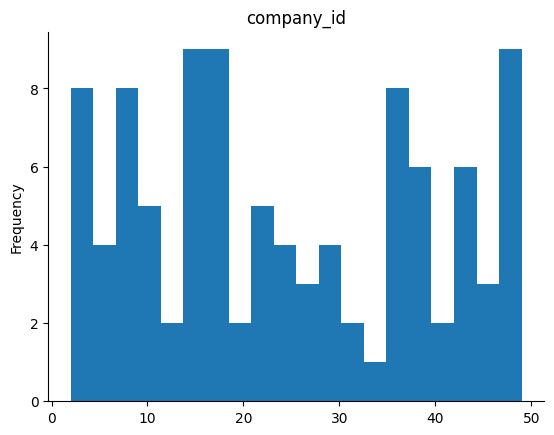

In [173]:
# @title azienda_id

from matplotlib import pyplot as plt
df_interviews['company_id'].plot(kind='hist', bins=20, title='company_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

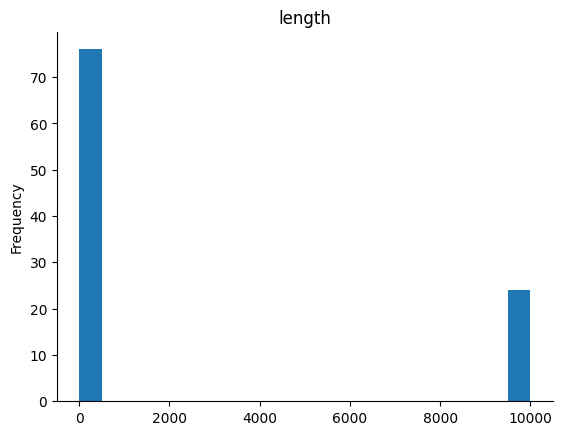

In [174]:
# @title durata_minuti

from matplotlib import pyplot as plt
df_interviews['length'].plot(kind='hist', bins=20, title='length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [175]:
# that's a mistake, no doubt, as these are lengths in minutes. let's fix it.

for x in df_interviews.index:
  if df_interviews.loc[x, "length"] == 10000:
    df_interviews.loc[x, "length"] = 100

df_interviews

,id,student_id,company_id,date_time,location,length,company_feedback,student_feedback
0,1,16,48,2024-12-24 20:16:00,"Vicolo Giorgia 6 Piano 5\nSesto Ansaldo, 15747...",120,5.0,NaN
1,2,48,38,2025-04-07 17:13:00,"Strada Dina 9 Appartamento 30\nBorgo Arnaldo, ...",60,5.0,4.0
2,3,24,15,2025-05-16 23:59:00,Viale Filippelli 54 Appartamento 19\nSettimo L...,100,5.0,NaN
3,4,6,49,2024-01-08 12:41:00,"Contrada Antonella 1\nIppazio nell'emilia, 287...",5,1.0,2.0
4,5,41,11,2024-09-26 14:20:00,"Via Angeli 5 Piano 9\nBorgo Cristina, 68516 Sa...",60,5.0,1.0
...,...,...,...,...,...,...,...,...
95,96,30,4,2024-06-24 17:42:00,Strada Melina 1 Appartamento 43\nMalatesta sal...,120,2.0,1.0
96,97,30,9,2025-08-02 00:04:00,"Strada Serafina 022 Piano 5\nInzaghi sardo, 55...",60,5.0,5.0
97,98,39,21,2024-03-09 17:48:00,Canale Depero 202 Appartamento 69\nRoncalli li...,60,5.0,NaN
98,99,28,36,2025-04-30 21:07:00,Strada Giulio 5 Appartamento 89\nSesto Ugolino...,60,2.0,NaN


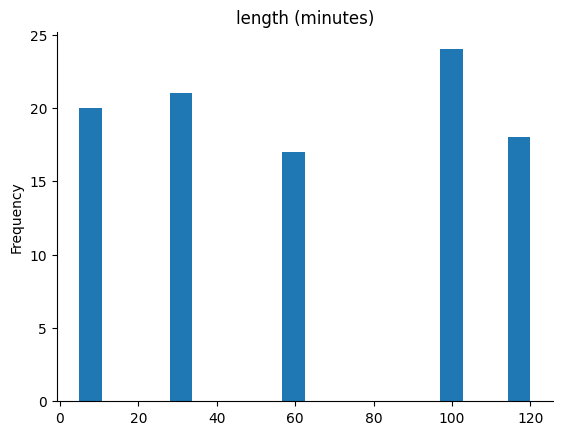

In [176]:
# @title durata_minuti

from matplotlib import pyplot as plt
df_interviews['length'].plot(kind='hist', bins=20, title='length (minutes)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [177]:
df_interviews

,id,student_id,company_id,date_time,location,length,company_feedback,student_feedback
0,1,16,48,2024-12-24 20:16:00,"Vicolo Giorgia 6 Piano 5\nSesto Ansaldo, 15747...",120,5.0,NaN
1,2,48,38,2025-04-07 17:13:00,"Strada Dina 9 Appartamento 30\nBorgo Arnaldo, ...",60,5.0,4.0
2,3,24,15,2025-05-16 23:59:00,Viale Filippelli 54 Appartamento 19\nSettimo L...,100,5.0,NaN
3,4,6,49,2024-01-08 12:41:00,"Contrada Antonella 1\nIppazio nell'emilia, 287...",5,1.0,2.0
4,5,41,11,2024-09-26 14:20:00,"Via Angeli 5 Piano 9\nBorgo Cristina, 68516 Sa...",60,5.0,1.0
...,...,...,...,...,...,...,...,...
95,96,30,4,2024-06-24 17:42:00,Strada Melina 1 Appartamento 43\nMalatesta sal...,120,2.0,1.0
96,97,30,9,2025-08-02 00:04:00,"Strada Serafina 022 Piano 5\nInzaghi sardo, 55...",60,5.0,5.0
97,98,39,21,2024-03-09 17:48:00,Canale Depero 202 Appartamento 69\nRoncalli li...,60,5.0,NaN
98,99,28,36,2025-04-30 21:07:00,Strada Giulio 5 Appartamento 89\nSesto Ugolino...,60,2.0,NaN


In [178]:
# time to handle nulls. I see two options: either drop the rows or fill them with statistical values like means, but that can falsify the analysis.
# of course in this context, it doesn't really matter.
# I could do something like:

# x = df_appuntamenti["company_feedback"].mean()
# df_appuntamentivalaz_media["company_feedback"] = df_appuntamenti["company_feedback"].fillna(x)

# and do the same for the other column.

# buut for the sake of practicality in the context, I chose to drop the rows.

df_interviews.dropna(inplace= True)

df_interviews

,id,student_id,company_id,date_time,location,length,company_feedback,student_feedback
1,2,48,38,2025-04-07 17:13:00,"Strada Dina 9 Appartamento 30\nBorgo Arnaldo, ...",60,5.0,4.0
3,4,6,49,2024-01-08 12:41:00,"Contrada Antonella 1\nIppazio nell'emilia, 287...",5,1.0,2.0
4,5,41,11,2024-09-26 14:20:00,"Via Angeli 5 Piano 9\nBorgo Cristina, 68516 Sa...",60,5.0,1.0
5,6,25,25,2024-07-31 22:26:00,"Borgo Alboni 63 Piano 4\nLeone laziale, 45301 ...",120,4.0,5.0
6,7,17,36,2024-07-22 04:49:00,Canale Laureano 93 Appartamento 27\nQuarto Lud...,5,1.0,5.0
...,...,...,...,...,...,...,...,...
93,94,26,16,2024-10-30 00:46:00,Stretto Giosuè 23 Appartamento 46\nSettimo Gre...,100,1.0,1.0
94,95,50,28,2025-03-21 22:38:00,"Vicolo Galasso 83 Piano 6\nErnesto a mare, 375...",100,2.0,5.0
95,96,30,4,2024-06-24 17:42:00,Strada Melina 1 Appartamento 43\nMalatesta sal...,120,2.0,1.0
96,97,30,9,2025-08-02 00:04:00,"Strada Serafina 022 Piano 5\nInzaghi sardo, 55...",60,5.0,5.0


<Axes: ylabel='Frequency'>

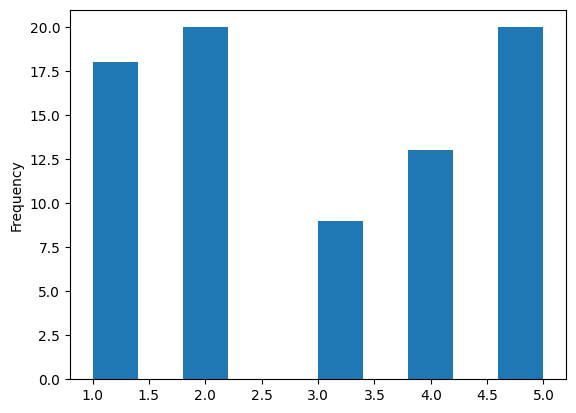

In [179]:
df_interviews["student_feedback"].plot(kind = "hist") # no values out of range

<Axes: ylabel='Frequency'>

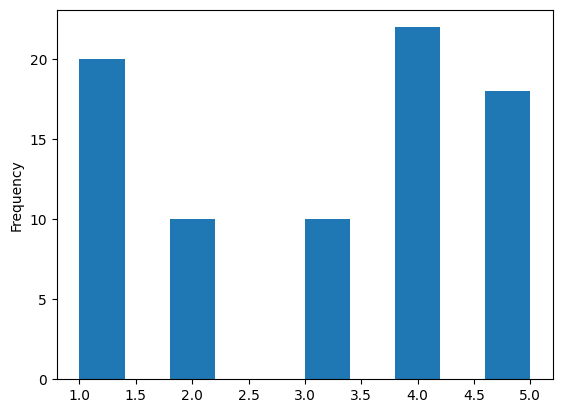

In [180]:
df_interviews["company_feedback"].plot(kind = "hist")

 ## Visualization

In [181]:
df_companies

,id,company_name,address,town,work_field
0,1,"Grossi, Savorgnan e Gualtieri SPA",Canale Vergerio 175 Piano 6,Rolando salentino,Sviluppo Software
1,2,"Oliboni, Malaparte e Malacarne SPA",Piazza Zichichi 0 Piano 4,Settimo Nina,Sicurezza Informatica
2,3,"Cagnin, Barracco e Mascheroni s.r.l.",Via Bulzoni 56,Borgo Donatello,Sicurezza Informatica
3,4,Malacarne-Morgagni SPA,Via Margherita 685 Appartamento 60,Adelasia lido,Supporto Tecnico
4,5,Giannotti s.r.l.,Vicolo Gangemi 1,Marangoni terme,Supporto Tecnico
5,6,Carriera-Cagnotto e figli,Viale Pagliaro 8,Costalonga veneto,Sviluppo Software
6,7,"Paganini, Gagliardi e Ruffini s.r.l.",Strada Pace 5,Quarto Guido del friuli,Sviluppo Software
7,8,Montesano e figli,Strada Renata 3,Borgo Marcello,Sicurezza Informatica
8,9,"Gregori, Druso e Capone SPA",Rotonda Monica 950,Sesto Arnaldo,Supporto Tecnico
9,10,Orengo-Toselli SPA,Vicolo Antonello 8 Piano 7,San Sante veneto,Supporto Tecnico


<Axes: ylabel='work_field'>

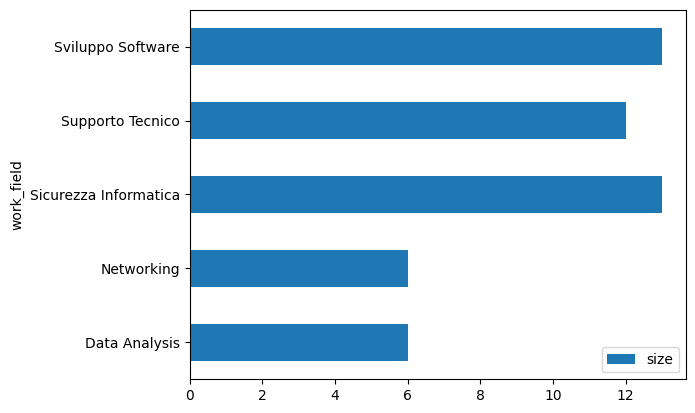

In [182]:
# companies for fields

aziende_count = df_companies.groupby("work_field", as_index= False).size()

aziende_count.plot.barh("work_field", "size")

<Axes: xlabel='date_time'>

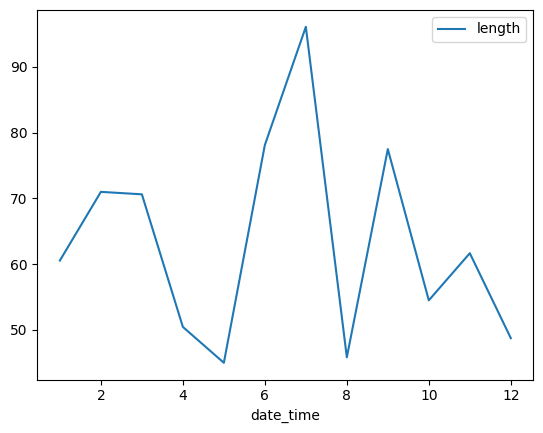

In [183]:
# estraiamo il mese dal datetime

df_for_length = df_interviews

df_for_length["date_time"] = df_for_length["date_time"].dt.month

df_avg_len = df_for_length.groupby("date_time", as_index= False)["length"].mean()

df_avg_len.plot.line("date_time", "length")

## Raggruppamenti

In [184]:
# let's create the complete DF

df_complete_p1 = df_interviews.merge(df_students, left_on="student_id", right_on= "id")

df_complete_p1

,id_x,student_id,company_id,date_time,location,length,company_feedback,student_feedback,id_y,name,date_of_birth,address
0,2,48,38,4,"Strada Dina 9 Appartamento 30\nBorgo Arnaldo, ...",60,5.0,4.0,48,Rita Montanariello,2006-10-13,Strada Trobbiani 02
1,4,6,49,1,"Contrada Antonella 1\nIppazio nell'emilia, 287...",5,1.0,2.0,6,Gelsomina Renzi,2007-01-08,Borgo Cicilia 7 Appartamento 01
2,5,41,11,9,"Via Angeli 5 Piano 9\nBorgo Cristina, 68516 Sa...",60,5.0,1.0,41,Fabrizia Contarini,2007-02-10,Strada Atenulf 499 Piano 7
3,6,25,25,7,"Borgo Alboni 63 Piano 4\nLeone laziale, 45301 ...",120,4.0,5.0,25,Salvi Bonomo,2003-04-04,Incrocio Simone 32 Appartamento 16
4,7,17,36,7,Canale Laureano 93 Appartamento 27\nQuarto Lud...,5,1.0,5.0,17,Leonardo Cammarata,2007-05-16,Strada Canevascini 8
...,...,...,...,...,...,...,...,...,...,...,...,...
75,94,26,16,10,Stretto Giosuè 23 Appartamento 46\nSettimo Gre...,100,1.0,1.0,26,Ronaldo Turchi,2004-02-20,Vicolo Tiepolo 87 Appartamento 77
76,95,50,28,3,"Vicolo Galasso 83 Piano 6\nErnesto a mare, 375...",100,2.0,5.0,50,Manuel Bertolucci,2001-11-17,Incrocio Combi 869 Appartamento 22
77,96,30,4,6,Strada Melina 1 Appartamento 43\nMalatesta sal...,120,2.0,1.0,30,Biagio Segrè-Antonioni,2005-10-03,Borgo Bombieri 0
78,97,30,9,8,"Strada Serafina 022 Piano 5\nInzaghi sardo, 55...",60,5.0,5.0,30,Biagio Segrè-Antonioni,2005-10-03,Borgo Bombieri 0


In [185]:
df_complete = df_complete_p1.merge(df_companies, left_on="company_id", right_on="id")

df_complete

,id_x,student_id,company_id,date_time,location,length,company_feedback,student_feedback,id_y,name,date_of_birth,address_x,id,company_name,address_y,town,work_field
0,2,48,38,4,"Strada Dina 9 Appartamento 30\nBorgo Arnaldo, ...",60,5.0,4.0,48,Rita Montanariello,2006-10-13,Strada Trobbiani 02,38,Cignaroli e figli,Rotonda Angelica 5 Piano 8,Settimo Valentina,Sicurezza Informatica
1,4,6,49,1,"Contrada Antonella 1\nIppazio nell'emilia, 287...",5,1.0,2.0,6,Gelsomina Renzi,2007-01-08,Borgo Cicilia 7 Appartamento 01,49,Antonini s.r.l.,Via Pontecorvo 3 Piano 8,Blasi sardo,Sicurezza Informatica
2,5,41,11,9,"Via Angeli 5 Piano 9\nBorgo Cristina, 68516 Sa...",60,5.0,1.0,41,Fabrizia Contarini,2007-02-10,Strada Atenulf 499 Piano 7,11,Comolli-Bodoni e figli,Incrocio Turchetta 78 Piano 1,Settimo Licia del friuli,Supporto Tecnico
3,6,25,25,7,"Borgo Alboni 63 Piano 4\nLeone laziale, 45301 ...",120,4.0,5.0,25,Salvi Bonomo,2003-04-04,Incrocio Simone 32 Appartamento 16,25,Morandini e figli,Via Filippo 9 Appartamento 70,Oscuro terme,Supporto Tecnico
4,7,17,36,7,Canale Laureano 93 Appartamento 27\nQuarto Lud...,5,1.0,5.0,17,Leonardo Cammarata,2007-05-16,Strada Canevascini 8,36,Pezzali-Mazzocchi Group,Piazza Lolita 786,Sesto Matilda salentino,Sviluppo Software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,94,26,16,10,Stretto Giosuè 23 Appartamento 46\nSettimo Gre...,100,1.0,1.0,26,Ronaldo Turchi,2004-02-20,Vicolo Tiepolo 87 Appartamento 77,16,Porzio-Leblanc e figli,Incrocio Capuana 97,Antonino del friuli,Networking
76,95,50,28,3,"Vicolo Galasso 83 Piano 6\nErnesto a mare, 375...",100,2.0,5.0,50,Manuel Bertolucci,2001-11-17,Incrocio Combi 869 Appartamento 22,28,Bragadin-Panatta e figli,Strada Monti 204,Cignaroli sardo,Sviluppo Software
77,96,30,4,6,Strada Melina 1 Appartamento 43\nMalatesta sal...,120,2.0,1.0,30,Biagio Segrè-Antonioni,2005-10-03,Borgo Bombieri 0,4,Malacarne-Morgagni SPA,Via Margherita 685 Appartamento 60,Adelasia lido,Supporto Tecnico
78,97,30,9,8,"Strada Serafina 022 Piano 5\nInzaghi sardo, 55...",60,5.0,5.0,30,Biagio Segrè-Antonioni,2005-10-03,Borgo Bombieri 0,9,"Gregori, Druso e Capone SPA",Rotonda Monica 950,Sesto Arnaldo,Supporto Tecnico


In [186]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_x              80 non-null     int64         
 1   student_id        80 non-null     int64         
 2   company_id        80 non-null     int64         
 3   date_time         80 non-null     int32         
 4   location          80 non-null     object        
 5   length            80 non-null     int64         
 6   company_feedback  80 non-null     float64       
 7   student_feedback  80 non-null     float64       
 8   id_y              80 non-null     int64         
 9   name              80 non-null     object        
 10  date_of_birth     80 non-null     datetime64[ns]
 11  address_x         80 non-null     object        
 12  id                80 non-null     int64         
 13  company_name      80 non-null     object        
 14  address_y         80 non-nul

In [ ]:
# let's clean the complete DF

df_complete.drop(["id_y", "id",], axis= 1, inplace= True)

df_complete.rename(columns={"id_x": "interview_id", "address_x": "student_address", "address_y": "company_address"}, inplace= True)

df_complete

,interview_id,student_id,company_id,date_time,location,length,company_feedback,student_feedback,name,date_of_birth,student_address,company_name,company_address,town,work_field
0,2,48,38,4,"Strada Dina 9 Appartamento 30\nBorgo Arnaldo, ...",60,5.0,4.0,Rita Montanariello,2006-10-13,Strada Trobbiani 02,Cignaroli e figli,Rotonda Angelica 5 Piano 8,Settimo Valentina,Sicurezza Informatica
1,4,6,49,1,"Contrada Antonella 1\nIppazio nell'emilia, 287...",5,1.0,2.0,Gelsomina Renzi,2007-01-08,Borgo Cicilia 7 Appartamento 01,Antonini s.r.l.,Via Pontecorvo 3 Piano 8,Blasi sardo,Sicurezza Informatica
2,5,41,11,9,"Via Angeli 5 Piano 9\nBorgo Cristina, 68516 Sa...",60,5.0,1.0,Fabrizia Contarini,2007-02-10,Strada Atenulf 499 Piano 7,Comolli-Bodoni e figli,Incrocio Turchetta 78 Piano 1,Settimo Licia del friuli,Supporto Tecnico
3,6,25,25,7,"Borgo Alboni 63 Piano 4\nLeone laziale, 45301 ...",120,4.0,5.0,Salvi Bonomo,2003-04-04,Incrocio Simone 32 Appartamento 16,Morandini e figli,Via Filippo 9 Appartamento 70,Oscuro terme,Supporto Tecnico
4,7,17,36,7,Canale Laureano 93 Appartamento 27\nQuarto Lud...,5,1.0,5.0,Leonardo Cammarata,2007-05-16,Strada Canevascini 8,Pezzali-Mazzocchi Group,Piazza Lolita 786,Sesto Matilda salentino,Sviluppo Software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,94,26,16,10,Stretto Giosuè 23 Appartamento 46\nSettimo Gre...,100,1.0,1.0,Ronaldo Turchi,2004-02-20,Vicolo Tiepolo 87 Appartamento 77,Porzio-Leblanc e figli,Incrocio Capuana 97,Antonino del friuli,Networking
76,95,50,28,3,"Vicolo Galasso 83 Piano 6\nErnesto a mare, 375...",100,2.0,5.0,Manuel Bertolucci,2001-11-17,Incrocio Combi 869 Appartamento 22,Bragadin-Panatta e figli,Strada Monti 204,Cignaroli sardo,Sviluppo Software
77,96,30,4,6,Strada Melina 1 Appartamento 43\nMalatesta sal...,120,2.0,1.0,Biagio Segrè-Antonioni,2005-10-03,Borgo Bombieri 0,Malacarne-Morgagni SPA,Via Margherita 685 Appartamento 60,Adelasia lido,Supporto Tecnico
78,97,30,9,8,"Strada Serafina 022 Piano 5\nInzaghi sardo, 55...",60,5.0,5.0,Biagio Segrè-Antonioni,2005-10-03,Borgo Bombieri 0,"Gregori, Druso e Capone SPA",Rotonda Monica 950,Sesto Arnaldo,Supporto Tecnico


In [188]:
# let's make a subset of the DF that only has relevant fields for the analysis.

df_complete_analysis = df_complete.drop(["date_of_birth", "student_address", "company_address", "town"], axis=1)

df_complete_analysis

,interview_id,student_id,company_id,date_time,location,length,company_feedback,student_feedback,name,company_name,work_field
0,2,48,38,4,"Strada Dina 9 Appartamento 30\nBorgo Arnaldo, ...",60,5.0,4.0,Rita Montanariello,Cignaroli e figli,Sicurezza Informatica
1,4,6,49,1,"Contrada Antonella 1\nIppazio nell'emilia, 287...",5,1.0,2.0,Gelsomina Renzi,Antonini s.r.l.,Sicurezza Informatica
2,5,41,11,9,"Via Angeli 5 Piano 9\nBorgo Cristina, 68516 Sa...",60,5.0,1.0,Fabrizia Contarini,Comolli-Bodoni e figli,Supporto Tecnico
3,6,25,25,7,"Borgo Alboni 63 Piano 4\nLeone laziale, 45301 ...",120,4.0,5.0,Salvi Bonomo,Morandini e figli,Supporto Tecnico
4,7,17,36,7,Canale Laureano 93 Appartamento 27\nQuarto Lud...,5,1.0,5.0,Leonardo Cammarata,Pezzali-Mazzocchi Group,Sviluppo Software
...,...,...,...,...,...,...,...,...,...,...,...
75,94,26,16,10,Stretto Giosuè 23 Appartamento 46\nSettimo Gre...,100,1.0,1.0,Ronaldo Turchi,Porzio-Leblanc e figli,Networking
76,95,50,28,3,"Vicolo Galasso 83 Piano 6\nErnesto a mare, 375...",100,2.0,5.0,Manuel Bertolucci,Bragadin-Panatta e figli,Sviluppo Software
77,96,30,4,6,Strada Melina 1 Appartamento 43\nMalatesta sal...,120,2.0,1.0,Biagio Segrè-Antonioni,Malacarne-Morgagni SPA,Supporto Tecnico
78,97,30,9,8,"Strada Serafina 022 Piano 5\nInzaghi sardo, 55...",60,5.0,5.0,Biagio Segrè-Antonioni,"Gregori, Druso e Capone SPA",Supporto Tecnico


In [189]:
# companies that have met the most students

company_interviews = df_complete_analysis.groupby("company_name", as_index= False)["name"].count().rename(columns={"name":"students"})

company_interviews

,company_name,students
0,Antelami-Novaro SPA,1
1,Antonini s.r.l.,3
2,Bettin Group,1
3,Bonomo-Bianchini e figli,2
4,"Borromini, Eco e Tafuri s.r.l.",1
5,Bosio-Mazzi s.r.l.,1
6,Bragadin-Panatta e figli,2
7,"Cagnin, Barracco e Mascheroni s.r.l.",3
8,Capecchi-Prati Group,2
9,Carriera-Cagnotto e figli,1


In [190]:
company_interviews.max() 

company_name    Volta, Aulenti e Interminei SPA
students                                      5
dtype: object

In [191]:
company_interviews.min()

company_name    Antelami-Novaro SPA
students                          1
dtype: object

In [192]:
students_interviews = df_complete_analysis.groupby("name", as_index= False)["company_name"].nunique().rename(columns={"company_name": "companies_met"})

students_interviews

,name,companies_met
0,Annibale Rienzo,2
1,Antonia Gibilisco,1
2,Arnaldo Cabibbo-Randazzo,2
3,Benvenuto Ruberto,3
4,Biagio Segrè-Antonioni,2
5,Camilla Asmundo-Leone,1
6,Concetta Passalacqua,2
7,Dott. Simone Modiano,1
8,Elisa Gualandi,1
9,Fabrizia Contarini,3


In [193]:
students_interviews = students_interviews.sort_values(by="companies_met", ascending= False)

students_interviews.head(3) #top 3 studenti per aziende

,name,companies_met
28,Ruggiero Natta,6
25,Ronaldo Turchi,5
19,Marina Correr-Rocca,4


In [204]:
avg_feedback_companies = df_complete_analysis.groupby("company_name", as_index = False)["student_feedback"].mean()

avg_feedback_companies

,company_name,student_feedback
0,Antelami-Novaro SPA,3.00
1,Antonini s.r.l.,1.67
2,Bettin Group,4.00
3,Bonomo-Bianchini e figli,5.00
4,"Borromini, Eco e Tafuri s.r.l.",2.00
5,Bosio-Mazzi s.r.l.,2.00
6,Bragadin-Panatta e figli,3.00
7,"Cagnin, Barracco e Mascheroni s.r.l.",2.67
8,Capecchi-Prati Group,3.50
9,Carriera-Cagnotto e figli,5.00


In [205]:
avg_feedback_companies = avg_feedback_companies.sort_values("student_feedback", ascending= False)

print(avg_feedback_companies.head(5))
print(avg_feedback_companies.tail(5))

# top/bottom 5 companies for student rating

                          company_name  student_feedback
9            Carriera-Cagnotto e figli              5.00
3             Bonomo-Bianchini e figli              5.00
26                   Morandini e figli              5.00
30                      Petrassi Group              5.00
25  Monteverdi, Bodoni e Monicelli SPA              5.00
              company_name  student_feedback
20  Malacarne-Morgagni SPA              1.33
14          Colletti Group              1.00
15  Comolli-Bodoni e figli              1.00
16      Gadda-Conte s.r.l.              1.00
17        Giannotti s.r.l.              1.00


In [206]:
avg_feedback_students = df_complete_analysis.groupby("name", as_index= False)["company_feedback"].mean()

avg_feedback_students

,name,company_feedback
0,Annibale Rienzo,2.50
1,Antonia Gibilisco,3.00
2,Arnaldo Cabibbo-Randazzo,3.50
3,Benvenuto Ruberto,2.00
4,Biagio Segrè-Antonioni,3.50
5,Camilla Asmundo-Leone,4.00
6,Concetta Passalacqua,2.00
7,Dott. Simone Modiano,2.00
8,Elisa Gualandi,5.00
9,Fabrizia Contarini,4.67


In [207]:
avg_feedback_students = avg_feedback_students.sort_values("company_feedback", ascending= False)

avg_feedback_students.head(5)

# top 5 students for company feedback

,name,company_feedback
8,Elisa Gualandi,5.00
22,Puccio Ceravolo,5.00
24,Rodolfo Ossani-Cuzzocrea,5.00
33,Sonia Palombi-Roncalli,5.00
9,Fabrizia Contarini,4.67


<Axes: ylabel='work_field'>

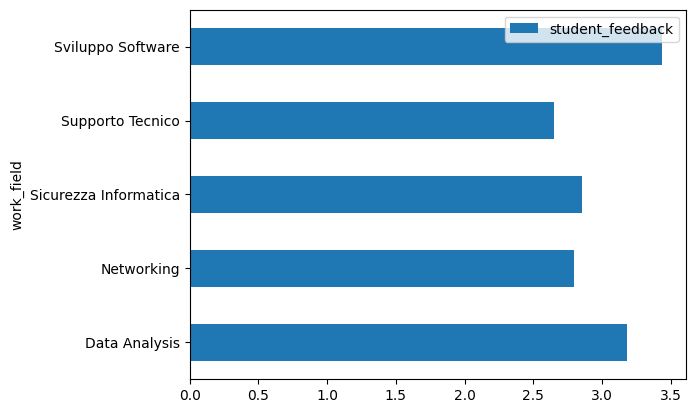

In [198]:
# avg rating
# i am using a complete DF that I've created in the following steps here

rating_by_field = df_complete_analysis.groupby("work_field", as_index= False)["student_feedback"].mean()

rating_by_field.plot.barh("work_field","student_feedback")

## Extra

In [199]:
df_complete["avg_general_feedback"] = (df_complete["company_feedback"] + df_complete["student_feedback"])/2

df_complete["avg_general_feedback"]

0     4.5
1     1.5
2     3.0
3     4.5
4     3.0
     ... 
75    1.0
76    3.5
77    1.5
78    5.0
79    4.0
Name: avg_general_feedback, Length: 80, dtype: float64

In [200]:
# for loop to append a valuation as a new column based on the previous score

for x in df_complete.index:
  if df_complete.loc[x, "avg_general_feedback"] <= 2.5:
    df_complete.loc[x,"final_evaluation"] = "Insufficent"
  elif df_complete.loc[x, "avg_general_feedback"] == 3:
    df_complete.loc[x,"final_evaluation"] = "Average"
  elif df_complete.loc[x, "avg_general_feedback"] > 3 and df_complete.loc[x, "avg_general_feedback"] <= 5:
    df_complete.loc[x,"final_evaluation"] = "Good"
  elif df_complete.loc[x, "avg_general_feedback"] == 5:
    df_complete.loc[x,"final_evaluation"] = "Excellent"

df_complete

,interview_id,student_id,company_id,date_time,location,length,company_feedback,student_feedback,name,date_of_birth,student_address,company_name,company_address,town,work_field,avg_general_feedback,final_evaluation
0,2,48,38,4,"Strada Dina 9 Appartamento 30\nBorgo Arnaldo, ...",60,5.0,4.0,Rita Montanariello,2006-10-13,Strada Trobbiani 02,Cignaroli e figli,Rotonda Angelica 5 Piano 8,Settimo Valentina,Sicurezza Informatica,4.5,Good
1,4,6,49,1,"Contrada Antonella 1\nIppazio nell'emilia, 287...",5,1.0,2.0,Gelsomina Renzi,2007-01-08,Borgo Cicilia 7 Appartamento 01,Antonini s.r.l.,Via Pontecorvo 3 Piano 8,Blasi sardo,Sicurezza Informatica,1.5,Insufficent
2,5,41,11,9,"Via Angeli 5 Piano 9\nBorgo Cristina, 68516 Sa...",60,5.0,1.0,Fabrizia Contarini,2007-02-10,Strada Atenulf 499 Piano 7,Comolli-Bodoni e figli,Incrocio Turchetta 78 Piano 1,Settimo Licia del friuli,Supporto Tecnico,3.0,Average
3,6,25,25,7,"Borgo Alboni 63 Piano 4\nLeone laziale, 45301 ...",120,4.0,5.0,Salvi Bonomo,2003-04-04,Incrocio Simone 32 Appartamento 16,Morandini e figli,Via Filippo 9 Appartamento 70,Oscuro terme,Supporto Tecnico,4.5,Good
4,7,17,36,7,Canale Laureano 93 Appartamento 27\nQuarto Lud...,5,1.0,5.0,Leonardo Cammarata,2007-05-16,Strada Canevascini 8,Pezzali-Mazzocchi Group,Piazza Lolita 786,Sesto Matilda salentino,Sviluppo Software,3.0,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,94,26,16,10,Stretto Giosuè 23 Appartamento 46\nSettimo Gre...,100,1.0,1.0,Ronaldo Turchi,2004-02-20,Vicolo Tiepolo 87 Appartamento 77,Porzio-Leblanc e figli,Incrocio Capuana 97,Antonino del friuli,Networking,1.0,Insufficent
76,95,50,28,3,"Vicolo Galasso 83 Piano 6\nErnesto a mare, 375...",100,2.0,5.0,Manuel Bertolucci,2001-11-17,Incrocio Combi 869 Appartamento 22,Bragadin-Panatta e figli,Strada Monti 204,Cignaroli sardo,Sviluppo Software,3.5,Good
77,96,30,4,6,Strada Melina 1 Appartamento 43\nMalatesta sal...,120,2.0,1.0,Biagio Segrè-Antonioni,2005-10-03,Borgo Bombieri 0,Malacarne-Morgagni SPA,Via Margherita 685 Appartamento 60,Adelasia lido,Supporto Tecnico,1.5,Insufficent
78,97,30,9,8,"Strada Serafina 022 Piano 5\nInzaghi sardo, 55...",60,5.0,5.0,Biagio Segrè-Antonioni,2005-10-03,Borgo Bombieri 0,"Gregori, Druso e Capone SPA",Rotonda Monica 950,Sesto Arnaldo,Supporto Tecnico,5.0,Good


In [201]:
df_complete["final_evaluation"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 80 entries, 0 to 79
Series name: final_evaluation
Non-Null Count  Dtype 
--------------  ----- 
80 non-null     object
dtypes: object(1)
memory usage: 772.0+ bytes


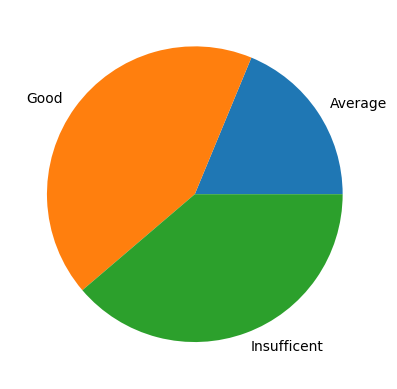

In [ ]:
evaluation_chart = df_complete.groupby("final_evaluation", as_index= False).size()
label_valutazioni = evaluation_chart["final_evaluation"].tolist()

plt.pie(evaluation_chart["size"], labels=label_valutazioni)
plt.show()